# Augment Trades Dataset
* Add stock types and country (scraped from finviz)
* Engineer features that are based on individual senators trading records
* Calculate target

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.dates as mdates
%matplotlib inline


In [45]:
#pull finviz data
finviz_raw_df = pd.read_csv("data/finviz_4-12-23.csv", header=0)

cols_to_merge = ["ticker", "sector", "industry", "country", "Index"]  #merge only these columns (other features contain price info which results in target leakage) 

fundamentals_df = finviz_raw_df[cols_to_merge]
fundamentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    2751 non-null   object
 1   sector    2751 non-null   object
 2   industry  2751 non-null   object
 3   country   2751 non-null   object
 4   Index     2751 non-null   object
dtypes: object(5)
memory usage: 107.6+ KB


In [46]:
#merge fundamentals to congress trades

In [47]:
congress_trades = pd.read_csv("data/congress_trades_all.csv")
print(congress_trades)

       Unnamed: 0  ReportDate TransactionDate Ticker     Representative  \
0               0  2020-04-16      2020-03-18   COTY   Gilbert Cisneros   
1               1  2020-01-10      2019-12-06   COTY   Gilbert Cisneros   
2               2  2019-09-11      2019-08-14   COTY   Gilbert Cisneros   
3               3  2019-09-16      2019-08-13   COTY      Dean Phillips   
4               4  2019-04-16      2019-03-14   COTY   Gilbert Cisneros   
...           ...         ...             ...    ...                ...   
22615       22615  2019-03-08      2019-02-15     BR   Gilbert Cisneros   
22616       22616  2018-10-30      2018-10-11     BR       Lois Frankel   
22617       22617  2018-08-24      2018-07-18     BR       Lois Frankel   
22618       22618  2018-04-27      2018-03-21     BR       Lois Frankel   
22619       22619  2020-12-08      2020-11-04    ACM          Susie Lee   

      Transaction  Amount            House           Range  
0            Sale  1001.0  Representat

In [48]:
##get rid of Unnamed index 
#congress_trades.drop(congress_trades.columns[0],axis=1,inplace=True)
#congress_trades.to_csv("congres_trades_all.csv", index=False)

In [49]:
fundamentals_df.rename(columns={"ticker": "Ticker"}, inplace=True)
merged_df = pd.merge(congress_trades,fundamentals_df, on="Ticker")
display(merged_df)

/var/folders/hn/vdq8ffhj0zq9blr74w80pr180000gn/T/ipykernel_5154/2419417019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fundamentals_df.rename(columns={"ticker": "Ticker"}, inplace=True)


,Unnamed: 0,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,House,Range,sector,industry,country,Index
0,0,2020-04-16,2020-03-18,COTY,Gilbert Cisneros,Sale,1001.0,Representatives,"$1,001-$15,000",Consumer Defensive,Household & Personal Products,USA,-
1,1,2020-01-10,2019-12-06,COTY,Gilbert Cisneros,Purchase,1001.0,Representatives,"$1,001-$15,000",Consumer Defensive,Household & Personal Products,USA,-
2,2,2019-09-11,2019-08-14,COTY,Gilbert Cisneros,Sale,1001.0,Representatives,"$1,001-$15,000",Consumer Defensive,Household & Personal Products,USA,-
3,3,2019-09-16,2019-08-13,COTY,Dean Phillips,Sale,1001.0,Representatives,"$1,001-$15,000",Consumer Defensive,Household & Personal Products,USA,-
4,4,2019-04-16,2019-03-14,COTY,Gilbert Cisneros,Purchase,1001.0,Representatives,"$1,001-$15,000",Consumer Defensive,Household & Personal Products,USA,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19388,22615,2019-03-08,2019-02-15,BR,Gilbert Cisneros,Purchase,1001.0,Representatives,"$1,001-$15,000",Technology,Information Technology Services,USA,S&P 500
19389,22616,2018-10-30,2018-10-11,BR,Lois Frankel,Sale,1001.0,Representatives,"$1,001-$15,000",Technology,Information Technology Services,USA,S&P 500
19390,22617,2018-08-24,2018-07-18,BR,Lois Frankel,Sale,1001.0,Representatives,"$1,001-$15,000",Technology,Information Technology Services,USA,S&P 500
19391,22618,2018-04-27,2018-03-21,BR,Lois Frankel,Sale,1001.0,Representatives,"$1,001-$15,000",Technology,Information Technology Services,USA,S&P 500


In [64]:
ticker_list = merged_df["Ticker"].unique()
len(ticker_list)


1153

In [50]:
merged_df.info()
#fundamaentals were successfully scraped for all congress trades trickers


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19393 entries, 0 to 19392
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       19393 non-null  int64  
 1   ReportDate       19060 non-null  object 
 2   TransactionDate  19393 non-null  object 
 3   Ticker           19393 non-null  object 
 4   Representative   19393 non-null  object 
 5   Transaction      19393 non-null  object 
 6   Amount           19393 non-null  float64
 7   House            19393 non-null  object 
 8   Range            19393 non-null  object 
 9   sector           19393 non-null  object 
 10  industry         19393 non-null  object 
 11  country          19393 non-null  object 
 12  Index            19393 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 2.1+ MB


## Now it is time to engineer some features

In [51]:
# time delta feature where we find the difference between transactions

## Now lets make target 
* use alpaca API to retrieve stock prices
* find future price 6 months out and if that is in the future take the current stock price
    * note that this method does not account for buying and selling the stock sooner than 6 months
    



In [52]:
# Import Alpaca SDK packages
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca.data.timeframe import TimeFrameUnit
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockLatestQuoteRequest
import json
from datetime import datetime, timedelta

#get Keys 
f = open("/Users/austinpaxton/Documents/credentials/ALPACA_cred.json")
data = json.load(f)

alpaca_key = data["KEY"]
alpaca_secret = data["SECRET_KEY"]




# initialize client to make requests
alpaca_client = StockHistoricalDataClient(alpaca_key, alpaca_secret)

#function that retrieves daily data for certain date  
def get_bar(client: StockHistoricalDataClient, ticker: str, start_date: datetime):
    print(type(client))
    request = StockBarsRequest(symbol_or_symbols=[ticker], 
                                   timeframe=TimeFrame.Day,
                                    start=start_date,
                                    end = start_date + timedelta(days=1),
                                    adjustment="split")
    bar = client.get_stock_bars(request_params = request) #use client to make request
    return bar[ticker][0]  #return alpaca data bar from specific day contains o, h, l, c, volume, vwap




In [53]:
bar = get_bar(alpaca_client, "AAPL", datetime(2023,4,21))
print(bar.open)
print(type(bar.open))

<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>
165.05
<class 'float'>


In [54]:
bar = get_bar(alpaca_client, "AAPL", datetime(2023,4,22))
#we get key error when we try to query on a date
print(bar)

<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>


KeyError: 'No key AAPL was found.'

AAPL
<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>
Initial Price: 158.735, type: <class 'float'>
End Date: 2022-05-31 00:00:00, type: <class 'datetime.datetime'>
<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>
Final Price: 149.07, type: <class 'float'>
-0.060887642926890855


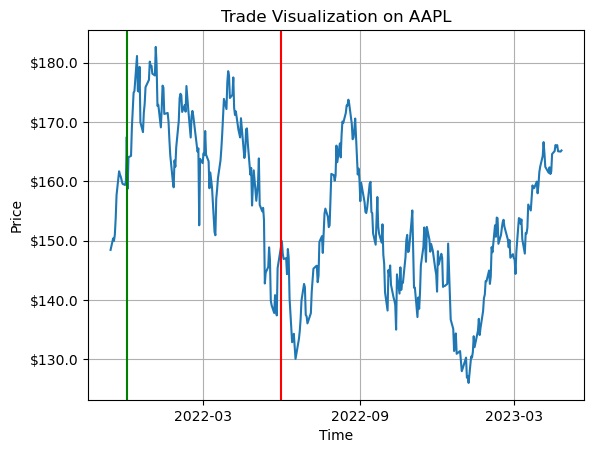

In [55]:
date = datetime(2021,12,2)
transaction ="Purchase"

test_return, end_date = get_trade_return("AAPL", date, transaction, 180)
visualize_trade("AAPL", date ,end_date, transaction, alpaca_client)
print(test_return)

In [56]:
# create function to find returns
# apply it as a lambda funtion so we can take other args

"""
period: number of days we use to calculate end date where return is calculated
"""

def get_trade_return(ticker: str, TransactionDate: datetime,Transaction: str, period: int):
    print(ticker)
    period = timedelta(days=period)
    price_i = get_bar(alpaca_client, ticker, TransactionDate).open
    print(f"Initial Price: {price_i}, type: {type(price_i)}")
    end_date = TransactionDate + period
    print(f"End Date: {end_date}, type: {type(end_date)}")
    today = datetime.today()
    if end_date > today:
        end_date = today - timedelta(minute=15) #alpaca quotes delayed for 15 min
    if end_date.weekday() == 5:  #if saturday adjust to previous friday (so market is open)
        end_date -= timedelta(days=1)
    elif end_date.weekday() == 6:
        end_date -= timedelta(days=2) #if saturday adjust to previous friday (so market is open)
        
    #weekend edge cases handled but market closed holidays are still an issue
    #handle them w try except (key error from get_bar(function) bc no bars returned)
    try: 
        price_f = get_bar(alpaca_client, ticker, end_date).open
        print(f"Final Price: {price_f}, type: {type(price_f)}")
    except KeyError: #weekend edge cases handled but market closed holidays are still an issue
        print(end_date)
        print(f"no bar returned for ticker: {ticker}")
        end_date = prev_wednessday(end_date) #take previous wednesday bc no holidays fall on a wednesday
    
    #calculate % return
    if Transaction == "Purchase":
        return_on_trade = (price_f-price_i)/price_i
    elif Transaction == "Sale":
        return_on_trade = (price_i-price_f)/price_i
        
    return return_on_trade, end_date
        
        
    
        
    

In [57]:
def prev_wednessday(date: datetime):
    weekday = date.weekday()
    day_difference = abs(weekday-2)
    if weekday > 2:
        date -= timedelta(day_difference)
    elif weekday<2:
        date += timedelta(day_difference)
    return date
        
    

In [58]:
def y_fmt(x,y):
    return '${}'.format(x)

def visualize_trade(ticker: str, tradedate: datetime, return_date: datetime, transaction: str, client: StockHistoricalDataClient):
    request = StockBarsRequest(symbol_or_symbols=[ticker], 
                                   timeframe=TimeFrame.Day,
                                    start=tradedate - timedelta(days=20),
                                    adjustment="split")
    bar = client.get_stock_bars(request_params = request)
    bar_df = bar.df
    plot_df = bar_df.droplevel(level=0)

    fig, ax = plt.subplots()
    ax.plot(plot_df.open)
    ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
    five_year_locator = mdates.MonthLocator(interval=6)
    ax.xaxis.set_major_locator(five_year_locator)
    ax.grid()
    ax.title.set_text(f"Trade Visualization on {ticker}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
    ax.tick_params(axis='y')
    
    if transaction is "Sale":
        color_i = "r"
        color_f = "g"
    else:
        color_i = "g"
        color_f = "r"
        
    ax.axvline(x = tradedate, color = color_i, label = 'Trade') #plot trade date
    ax.axvline(x = return_date, color = color_f, label = 'Trade') #plot return date
    

<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/hn/vdq8ffhj0zq9blr74w80pr180000gn/T/ipykernel_5154/974719873.py:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if transaction is "Sale":


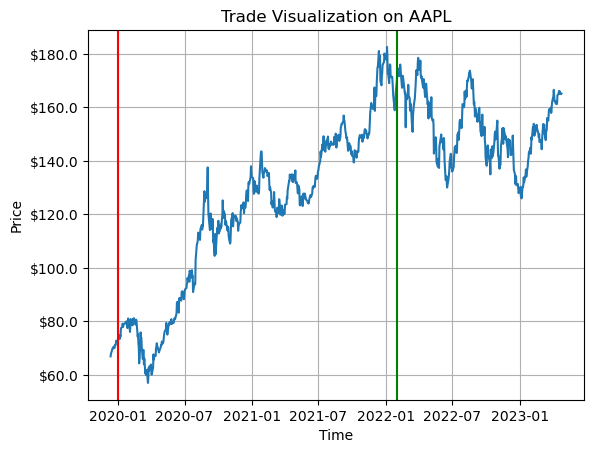

In [59]:
visualize_trade("AAPL", datetime(2020,1,1), datetime(2022,2,1), "Sale", alpaca_client)


In [60]:
# convert transaction date to datetime object 
def convert_to_date(timestamp):
    return pd.to_datetime(timestamp)

merged_df["TransactionDate"] = merged_df["TransactionDate"].apply(convert_to_date, )

In [61]:
merged_df["6mo_return"] = merged_df.apply(lambda x: get_trade_return(x["Ticker"], x["TransactionDate"], x["Transaction"], period=180)[0],axis=1)


COTY
<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>
Initial Price: 5.05, type: <class 'float'>
End Date: 2020-09-14 00:00:00, type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>
Final Price: 3.57, type: <class 'float'>
COTY
<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>
Initial Price: 11.85, type: <class 'float'>
End Date: 2020-06-03 00:00:00, type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>
Final Price: 4.48, type: <class 'float'>
COTY
<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>
Initial Price: 9.58, type: <class 'float'>
End Date: 2020-02-10 00:00:00, type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>
Final Price: 12.0, type: <class 'float'>
COTY
<class 'alpaca.data.historical.stock.StockHistoricalDataClient'>
Initial 

UnboundLocalError: local variable 'price_f' referenced before assignment

In [ ]:
columns = merged_df.columns
print(columns)
print(len(columns[3]))